# Bias-Variance tradeoff

## We have to choose the optimal model

How?

> By choosing the optimal model complexity

In our case of Polynomial regression, we have to decide on a particular degree of polynomials

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from joblib import load

## Importing our saved poly. regression model

In [4]:
model = load('polynomial_regression_sales.joblib')

In [6]:
model.coef_

array([ 5.16525487e-02,  2.10742970e-02,  6.88373531e-03, -1.09702663e-04,
        1.10525949e-03, -4.55155391e-05,  1.11997015e-04,  8.26605896e-05,
        1.19125650e-05])

## We measure error vs degree of complexity for our model to determine optimal complexity

Prepare dataset to train several models of varying degrees

In [9]:
df = pd.read_csv('Advertising.csv')

In [11]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
X = df.drop('sales', axis=1)
y = df['sales']

In [14]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Create multiple degree models

- Create different order polynomial features
- Split those polynomial features into train/test
- Store/save RMSE for both train and test
- Plot the results

In [20]:
from sklearn.linear_model import LinearRegression

train_rmse = []
test_rmse = []

for degree in range(1, 10):
    poly_converter = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    
    train_rmse.append(np.sqrt(mean_squared_error(y_train, train_predict)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, test_predict))) 

## Plotting the errors

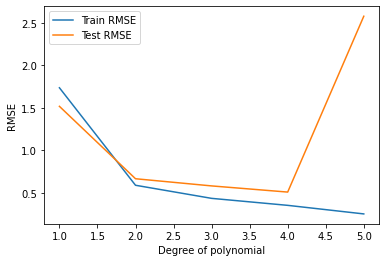

In [26]:
plt.plot(range(1,6), train_rmse[:5], label='Train RMSE')
plt.plot(range(1,6), test_rmse[:5], label='Test RMSE')
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE')
plt.legend()

We can clearly notice that as we increase the complexity, the RMSE values for both train and test sets keep decreasing.

But at some point the RMSE for test set explodes. That is the point where **overfitting** occurs

## Extreme overfitting

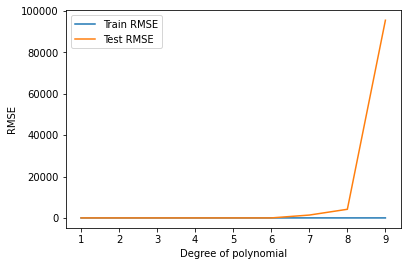

In [27]:
plt.plot(range(1,10), train_rmse, label='Train RMSE')
plt.plot(range(1,10), test_rmse, label='Test RMSE')
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE')
plt.legend()